## **Face Detection and Recognition**
Face Detection: This involves detecting faces using facial features inorder to identify human faces in photos or videos using machine learning algorithm.

Face recognition: This involves identifying or confirming an individual's identity by matching it against a database of faces.

It is quite easy for humans to carry out face detection and recognition everyday but systems or models have to be trained and tested on huge amounts of data to be accurate.


**This version uses face_recognition library for both face detection and recognition**

**Face_recognition**: This is a library that can be used to detect faces in an image and recognize faces in an image folder


In [1]:
# Install prerquisites
#in google colab, connect to GPU before running the code
!pip install face_recognition
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566170 sha256=cbb875122a513c96ab454b3552ed178ee0b54ae5fa6d1eaff5f59d85bad791ab
  Stored in directory: /root/.cache/pip/wheels/7a/eb/cf/e9eced74122b679557f597bb7c8e4c739cfcac526db1fd523d
Successfully built face-recognition-models


In [2]:
#import libraries
import cv2
import os
import face_recognition
from google.colab.patches import cv2_imshow


In [3]:
#this is a function to draw a bounding box with a text around faces
def drawboundingbox(image,text):
  (top, right, bottom, left) = face_recognition.face_locations(image)[0]
  #draw a rectangle around the face detected
  cv2.rectangle(image, (left, top), (right, bottom), (0, 0, 0),2)
   #add a text to the bounding box
  cv2.putText(image, text, ((left+2), (top+20)), cv2.FONT_HERSHEY_PLAIN, 1.95, (0, 255, 0), 2)


In [4]:
#this is a function to detect faces in images
def detect_face(img):
  #load the image file
  image = face_recognition.load_image_file(img)
  if image is not None:
    return image

In [5]:
#mount your drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
def known_people_encodings(directory):
  # Create a list of encodings for the known people
  known_people = []

  # Iterate through each file in the directory
  for filename in os.listdir(directory):
      # Check if the file is an image
      if filename.endswith('.jpg') or filename.endswith('.png'):
          # Load the image
          img = os.path.join(directory, filename)
          image = detect_face(img)
          # Encode the image
          encodings = face_recognition.face_encodings(image)
         # Append the encodings to the list of known people
          if encodings:
              known_people.append(encodings[0])
  return known_people

In [7]:
#call the Known_people_encoding function
#this takes a long time to run beacuse it iterates through the directory and converts each image to an encoding
directory = '/content/gdrive/MyDrive/Face Data'
known_people = known_people_encodings(directory)

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

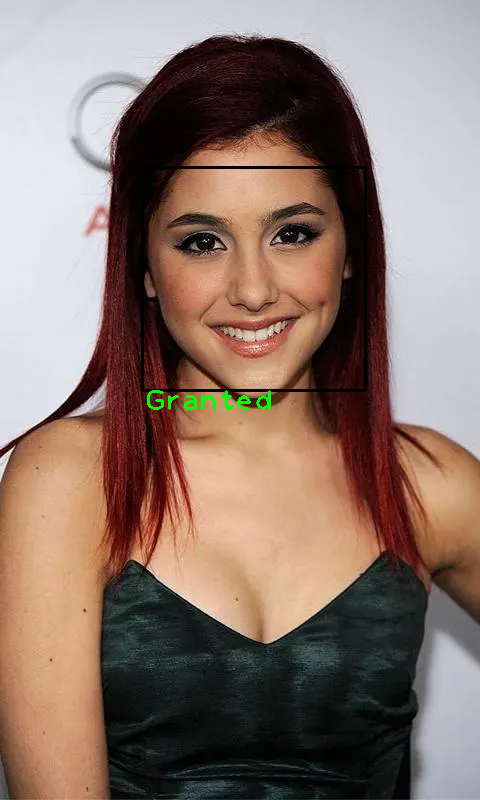

In [10]:
#define a function to carry out face recognition
def face_recog(img):
  image = detect_face(img)
  # Encode the image
  encodings = face_recognition.face_encodings(image)
  for encoding in encodings:
          # Compare the face encoding with the known people
          matches = face_recognition.compare_faces(known_people, encoding)
          # Check if the face matches with any of the known people
          #if there is a match, display the image with the text 'Granted'
          if True in matches:
             drawboundingbox(image,'Granted')
             print(matches)
             cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
             #if there is no match, display the image with the text 'Denied'
          elif False in matches:
            drawboundingbox(image,'Denied')
            cv2_imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))

face_recog('/content/gdrive/MyDrive/Test images/ariana5.jpg')